https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/#:~:text=A%20Multivariate%20time%20series%20has,used%20for%20forecasting%20future%20values.

In [1]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
#read the data
df = pd.read_csv("E:\IIT Kanpur\Placements\Projects\SBI Stock price prediction\\SBIN.NS.csv")#, parse_dates=[['Date', 'Time']])

#check the dtypes
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [3]:
df['Date'] = pd.to_datetime(df.Date)# , format = '%d/%m/%Y %H.%M.%S')

In [4]:
data = df.drop(['Date'], axis=1)
data.index = df.Date

In [5]:
data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-17,272.399994,274.0,270.500000,271.100006,265.187134,5571891
2015-07-20,272.000000,272.0,266.149994,267.450012,261.616760,6418930


In [6]:
#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen

#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues

coint_johansen(data ,-1, 1).eig

array([4.66158894e-01, 3.17817611e-01, 2.05601592e-01, 5.47320333e-02,
       6.21968466e-03, 2.42792921e-04])

In [7]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

In [8]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [9]:
# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [10]:
#converting predictions to dataframe
pred = pd.DataFrame(prediction)
pred.index = valid.index
pred.columns = valid.columns

In [13]:
cols = valid.columns

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for Open is :  85.54683130455679
rmse value for High is :  85.09777870387843
rmse value for Low is :  86.48176199892478
rmse value for Close is :  85.88270511710704
rmse value for Adj Close is :  86.22105633332727
rmse value for Volume is :  42959774.59671154


In [15]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[1.86621885e+02 1.90409977e+02 1.83248512e+02 1.86753602e+02
  1.86747308e+02 5.05650895e+07]]


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


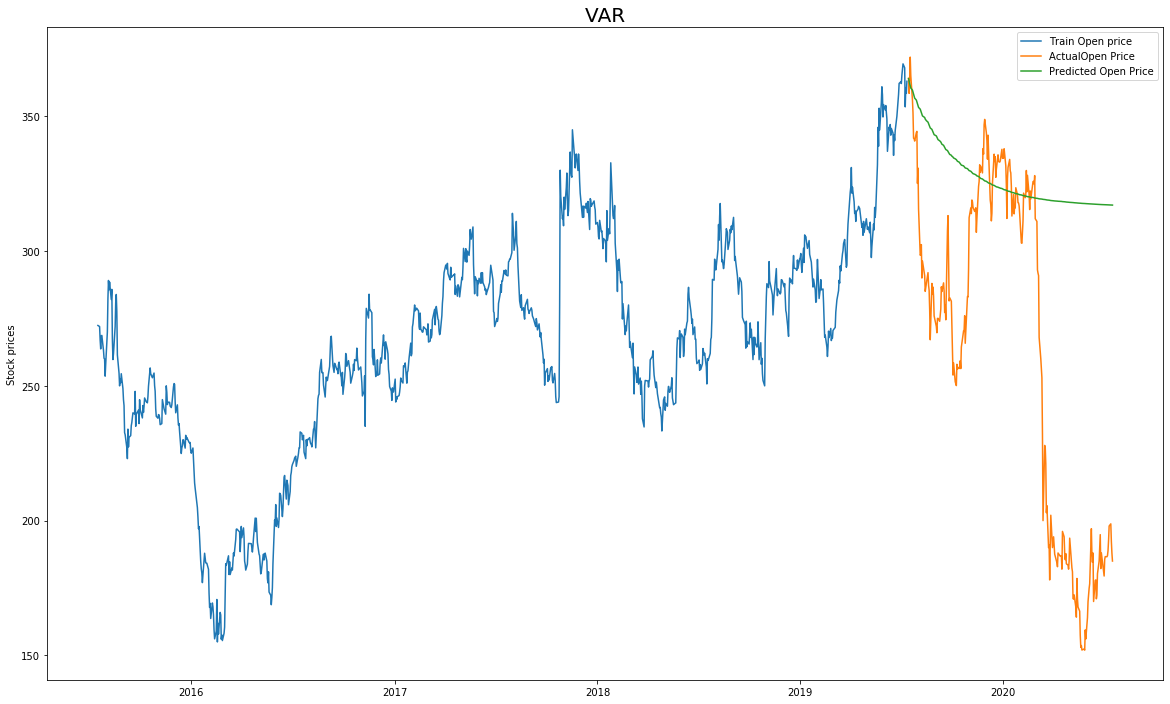

In [16]:
plt.figure(figsize=(20,12))

plt.plot(train['Open'], label='Train Open price')

plt.plot(valid['Open'], label='ActualOpen Price')

plt.plot(pred['Open'], label='Predicted Open Price')

plt.ylabel("Stock prices")
plt.title('VAR', fontsize = 20)
plt.legend()
plt.show()

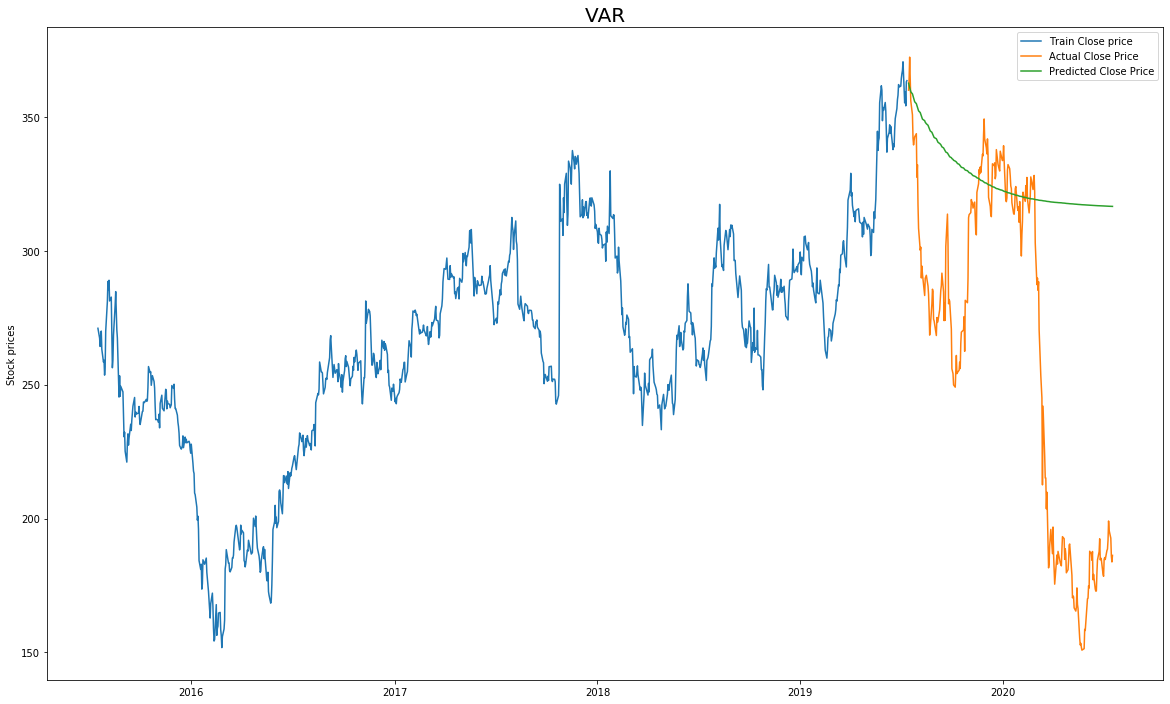

In [17]:
plt.figure(figsize=(20,12))
plt.plot(train['Close'], label='Train Close price')
plt.plot(valid['Close'], label='Actual Close Price')
plt.plot(pred['Close'], label='Predicted Close Price')
plt.ylabel("Stock prices")
plt.title('VAR', fontsize = 20)
plt.legend()
plt.show()

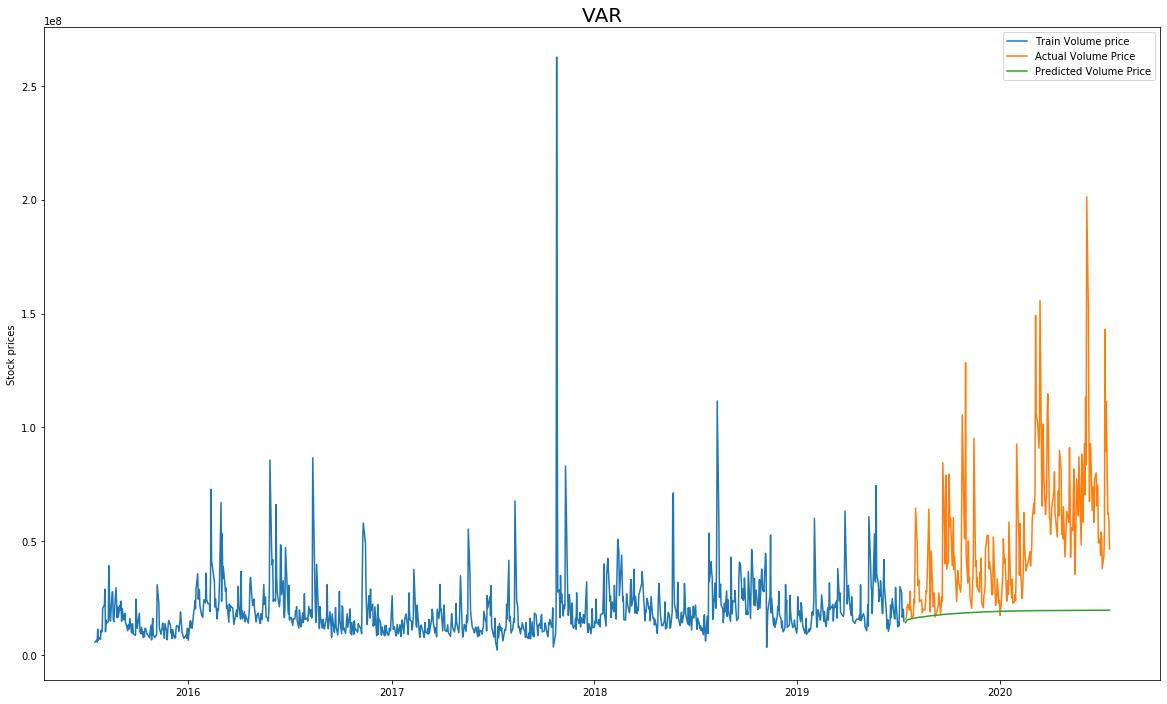

In [50]:
plt.figure(figsize=(20,12))
plt.plot(train['Volume'], label='Train Volume price')
plt.plot(valid['Volume'], label='Actual Volume Price')
plt.plot(pred['Volume'], label='Predicted Volume Price')
plt.ylabel("Stock prices")
plt.title('VAR', fontsize = 20)
plt.legend()
plt.show()